In [2]:
import numpy as np
import dense_basis as db
import matplotlib.pyplot as plt
from astropy.table import Table
import time

print('using versions:')
print('numpy: ',np.__version__)
print('dense basis: ',db.__version__)

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
using versions:
numpy:  1.16.4
dense basis:  0.1.8


In [3]:
db.set_plot_style()

In [5]:
galaxy_params = Table.read('JAGUAR_cat_basicsimsrcs.fits')
galaxy_params

ID,RA,DEC,redshift,mStar,sSFR,tau,tauV_eff,max_stellar_age,metallicity,HST_F435W_fnu,HST_F606W_fnu,HST_F775W_fnu,HST_F814W_fnu,HST_F850LP_fnu,HST_F105W_fnu,HST_F125W_fnu,HST_F140W_fnu,HST_F160W_fnu,IRAC_3p6_fnu,IRAC_4p5_fnu,NRC_F070W_fnu,NRC_F090W_fnu,NRC_F115W_fnu,NRC_F150W_fnu,NRC_F200W_fnu,NRC_F277W_fnu,NRC_F356W_fnu,NRC_F444W_fnu,NRC_F410M_F444W_fnu,NRC_F140M_fnu,NRC_F162M_fnu,NRC_F182M_fnu,NRC_F210M_fnu,NRC_F250M_fnu,NRC_F300M_fnu,NRC_F335M_fnu,NRC_F360M_fnu,NRC_F410M_fnu,NRC_F430M_fnu,NRC_F460M_fnu,NRC_F480M_fnu,luminosity_distance,Re_circ,Re_maj,axis_ratio,sersic_n,position_angle,MUV,beta,SFR_10,SFR_100,A1500,log_OH,logUs,C4_1548_1550_EW,O3_1660_EW,O3_1666_EW,C3_1907_1909_EW,O2_3726_3729_EW,HBaB_4861_EW,O3_4959_EW,O3_5007_EW,HBaA_6563_EW,C4_1548_flux,C4_1551_flux,O3_1661_flux,O3_1666_flux,C3_1907_flux,C3_1909_flux,O2_3726_flux,O2_3729_flux,Ne3_3869_flux,O3_4363_flux,HBaB_4861_flux,O3_4959_flux,O3_5007_flux,HBaA_6563_flux,N2_6584_flux,S2_6716_flux,S2_6731_flux
int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
309706,53.24449012392076,-27.805703698168408,1.5136213359961121,11.052468,-11.889757,8.322971,0.012315699,9.381358,-0.5354473607318297,113.51213,460.05054,2160.2456,2674.5918,4339.805,8918.163,13686.11,16090.222,18347.402,31856.543,32056.396,1202.1956,4325.724,11787.73,17803.814,24001.031,29437.87,31981.162,32501.812,33243.707,16532.334,19412.018,22462.178,25137.271,28642.582,30178.67,31366.47,31715.822,34492.863,34404.96,30455.215,29263.723,11039.631,1.757824,0.30342,0.468506,0.436625,329.599505,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309710,53.0635988976,-27.878166312100607,1.521827396074973,9.530622,-18.104128,7.5046544,0.9657444,8.992102,0.10411531194815196,3.5508556,16.303907,55.21339,66.268936,108.28084,253.56815,382.7341,437.88614,488.93475,850.75745,939.7967,34.97874,109.0444,336.75436,476.3802,620.3528,788.26324,857.3137,944.2316,959.2286,449.44403,509.18185,578.97656,650.9807,750.9917,820.8084,854.1793,825.229,987.33575,1029.6499,882.60126,860.66754,11113.534,0.850806,0.162604,0.382048,1.956619,232.218343,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309713,53.15202591601325,-27.839024604720432,1.5326612026665323,10.78258,-11.88192,8.3847,1.5018191,9.434726,-0.04318983555194756,4.508774,32.061745,249.9087,324.3821,564.2264,1369.1461,2518.3904,3237.189,3950.3347,10756.371,12235.767,123.17397,549.0967,2015.055,3772.7683,6024.4673,9103.481,10855.892,12298.424,12478.457,3351.4172,4310.193,5349.7847,6540.126,8350.58,9754.187,10481.188,10605.794,12811.647,13307.774,11553.908,11198.504,11211.227,0.839617,0.219848,0.203462,2.500951,156.168468,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309716,53.134716049201316,-27.81118043888548,1.5453416977964467,10.464529,-13.288876,8.161345,1.579596,9.350247,-0.21578372213540803,2.9935777,26.137669,154.37184,197.35062,337.92032,794.5962,1431.4022,1828.4578,2216.6804,5854.4053,6614.4204,78.64962,331.11108,1155.2537,2121.0806,3329.382,4962

In [6]:
bagpipes_fits = Table.read('bagpipes_test_v1.fits')
bagpipes_fits

#ID,delayed:age_16,delayed:age_50,delayed:age_84,delayed:massformed_16,delayed:massformed_50,delayed:massformed_84,delayed:metallicity_16,delayed:metallicity_50,delayed:metallicity_84,delayed:tau_16,delayed:tau_50,delayed:tau_84,dust:Av_16,dust:Av_50,dust:Av_84,redshift_16,redshift_50,redshift_84,stellar_mass_16,stellar_mass_50,stellar_mass_84,formed_mass_16,formed_mass_50,formed_mass_84,sfr_16,sfr_50,sfr_84,ssfr_16,ssfr_50,ssfr_84,nsfr_16,nsfr_50,nsfr_84,mass_weighted_age_16,mass_weighted_age_50,mass_weighted_age_84,tform_16,tform_50,tform_84,tquench_16,tquench_50,tquench_84,UV_colour_16,UV_colour_50,UV_colour_84,VJ_colour_16,VJ_colour_50,VJ_colour_84,input_redshift,log_evidence,log_evidence_err,chisq_phot,n_bands
bytes2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2.1225956358634313,2.9986456797309238,3.7709821572409368,11.20260997165424,11.302400541491533,11.374177628745448,0.2293627709981146,0.3964514165603595,0.6882458000400389,0.37479638845739366,0.6778234875188414,1.3380393430374913,0.08864852474115739,0.2916834581436981,0.7461947489626419,1.405045907045617,1.503987545131857,1.639116520875838,10.95720733455767,11.045425821672222,11.113572465959997,11.20260997165424,11.302400541491533,11.374177628745448,4.305182312791078,13.794929820574424,47.83407155699452,-10.393553043224552,-9.94143417436421,-9.355127556267805,-1.0203651205283832,-0.5740026332608767,0.02703030764069288,1.3002242310371959,1.7588219992551215,2.346112693798969,1.8643450931607595,2.3345288646757387,2.850117881809762,4.3786124508050825,99.0,99.0,2.1419062836957057,2.486817322905437,3.073449826535977,0.39599748949326496,0.46332265873305545,0.5792115202001923,0.0,497.22267014177055,0.18609580716081106,0.8160203635612552,12.0
2,1.7656316009387933,2.5432191217178035,3.645998479855124,9.533353276646428,9.605013965410784,9.679257427534438,1.0193064803614234,1.2807482185558867,1.5463822521199833,0.31707370022215386,0.5886761374148921,1.1057897738578397,0.024981259689809784,0.09381969898109743,0.25703062652222075,1.3751523189753536,1.4230021716670855,1.4713004153648077,9.30460489787283,9.366520022839607,9.426632195391916,9.533353276646428,9.605013965410784,9.679257427534438,0.25964615689670356,0.4400315629514716,0.6542052651719864,-9.946316550111646,-9.755838842050903,-9.558148863341547,-0.5306809283732699,-0.35999760583283447,-0.15477984296205508,1.140936029592427,1.5135442189217287,2.004716282061366,2.3318311908466707,2.885219966904991,3.323132053017374,99.0,99.0,99.0,1.6820704968333364,1.9222076844268599,2.340130111153386,0.47576770572617966,0.5272395611485123,0.5886688776696579,0.0,540.1476375879658,0.2021269418411122,3.5850413396647007,12.0
3,2.2816306555865045,3.033711571728349,3.8155047667212685,10.877207647703322,10.960975841240078,11.02592672822465,0.6024869542591859,1.206730004579192,1.7920386108304434,0.16557841631246145,0.2791000149086739,0.4459738502587438,0.1124047341556219,0.3571473574551416,0.765360795712259,1.439899115211702,1.4878467854524522,1.5381174780439641,10.619044837638066,10.687908766619564,10.74338332744196,10.877207647703322,10.960975841240078,11.02592672822465,0.0013191535579282676,0.1289071552277567,0.981860007251856,-13.599683234052092,-11.537897425744115,-10.689611917738254,-4.25317662141428,-2.170623172403012,-1.3274590808539564,1.8290970454241524,2.4093329744484455,3.0438931320518106,1.184224162909616,1.8144144280288788,2.420346583314518,2.3957062527414195,3.2266851295267447,3.771382207575257,4.012353794578398,4.913159883281644,5.496446364057936,0.9809309247172562,1.028819390419459,1.086454725165679,0.0,514.7817596983699,0.1861384726786955,0.393334491044357

In [7]:
#db_fits = Table.read('db_fits_v2.fits')
db_fits = Table.read('db_fits_v2_snr_30.fits')
#db_fits = Table.read('db_fits_v2_snr_100.fits')
#db_fits = Table.read('db_fits_v2_snr_300.fits')
db_fits

mstar_50,mstar_16,mstar_84,sfr_50,sfr_16,sfr_84,redshift_50,redshift_16,redshift_84
float64,float64,float64,float64,float64,float64,float64,float64,float64
11.1815000000024,11.125500000002381,11.250500000002422,0.35250000000212145,-1.1484999999983798,1.1635000000023923,1.9555043781690506,1.7485043781690734,2.1515043781690286
9.613500000001876,9.563500000001858,9.679500000001896,-1.2564999999984159,-2.7064999999989,-0.4264999999981387,1.8815043781690588,1.7415043781690742,2.0875043781690357
10.848500000002288,10.784500000002266,10.912500000002309,-0.030499999998006455,-1.3834999999984583,0.7635000000022587,2.0415043781690407,1.8325043781690642,2.186504378169025
10.569500000002195,10.509500000002175,10.640500000002218,-0.2704999999980866,-1.6344999999985421,0.4925000000021682,2.037504378169041,1.8115043781690665,2.183504378169025
10.846500000002287,10.781500000002266,10.91450000000231,-0.053499999998014136,-1.4254999999984723,0.7725000000022617,2.037504378169041,1.8105043781690666,2.1845043781690254
10.536500000002183,10.469500000002162,10.601500000002206,-0.35749999999811566,-1.8414999999986112,0.5065000000021729,2.008504378169045,1.789504378169069,2.1775043781690258
10.560500000002191,10.49850000000217,10.629500000002215,-0.2764999999980886,-1.6404999999985441,0.4895000000021672,2.0405043781690413,1.816504378169066,2.185504378169025
10.894500000002303,10.82850000000228,10.955500000002322,-0.1084999999980325,-1.583499999998525,0.7295000000022474,2.0535043781690394,1.8315043781690643,2.1875043781690247
10.13350000000205,10.072500000002028,10.195500000002069,-0.828499999998273,-2.2734999999987555,0.010500000002007237,2.0485043781690404,1.8445043781690629,2.1845043781690254


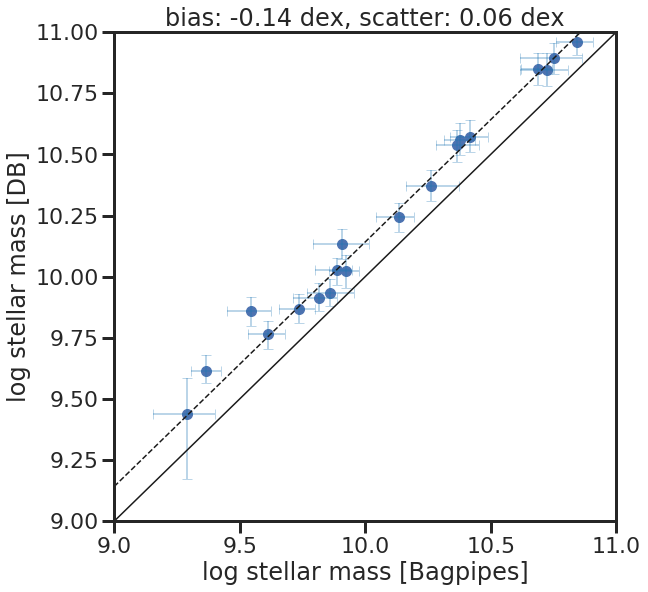

In [8]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['stellar_mass_50']
xerr_lo = bagpipes_fits['stellar_mass_50'] - bagpipes_fits['stellar_mass_16']
xerr_hi = bagpipes_fits['stellar_mass_84'] - bagpipes_fits['stellar_mass_50']
ydata = db_fits['mstar_50']
yerr_lo = db_fits['mstar_50'] - db_fits['mstar_16']
yerr_hi = db_fits['mstar_84'] - db_fits['mstar_50']
xlabel_val = 'log stellar mass [Bagpipes]'
ylabel_val = 'log stellar mass [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11],[9,11],'k-')
plt.plot([9,11],[9-medbias,11-medbias],'k--')
plt.axis([9,11,9,11])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_mass_comparison.png',bbox_inches='tight')

plt.show()

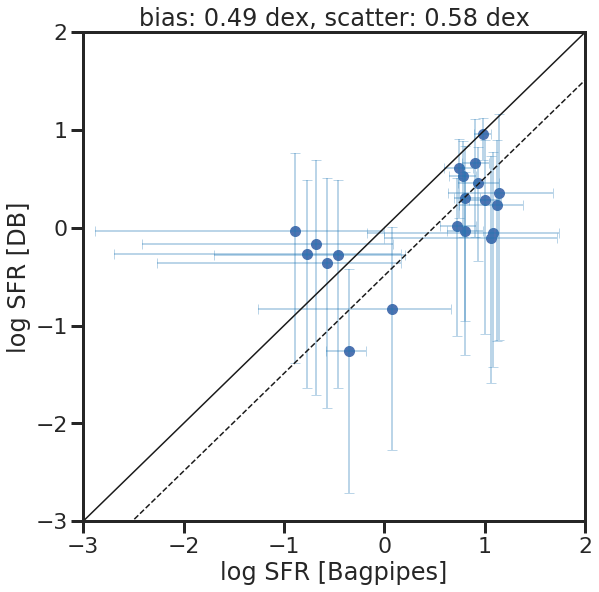

In [9]:

plt.figure(figsize=(9,9))

xdata = np.log10(bagpipes_fits['sfr_50'])
xerr_lo = np.log10(bagpipes_fits['sfr_50']) - np.log10(bagpipes_fits['sfr_16'])
xerr_hi = np.log10(bagpipes_fits['sfr_84']) - np.log10(bagpipes_fits['sfr_50'])
ydata = db_fits['sfr_50']
yerr_lo = db_fits['sfr_50'] - db_fits['sfr_16']
yerr_hi = db_fits['sfr_84'] - db_fits['sfr_50']
xlabel_val = 'log SFR [Bagpipes]'
ylabel_val = 'log SFR [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_sfr_comparison.png',bbox_inches='tight')

plt.show()

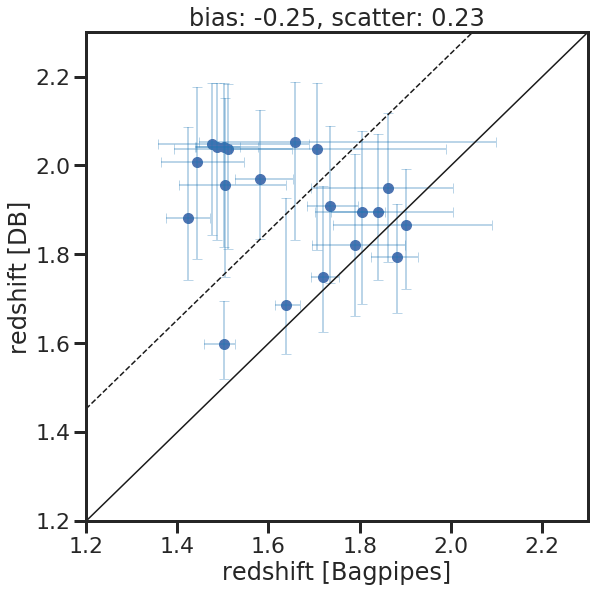

In [10]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['redshift_50']
xerr_lo = bagpipes_fits['redshift_50'] - bagpipes_fits['redshift_16']
xerr_hi = bagpipes_fits['redshift_84'] - bagpipes_fits['redshift_50']
ydata = db_fits['redshift_50']
yerr_lo = db_fits['redshift_50'] - db_fits['redshift_16']
yerr_hi = db_fits['redshift_84'] - db_fits['redshift_50']
xlabel_val = 'redshift [Bagpipes]'
ylabel_val = 'redshift [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_redshift_comparison.png',bbox_inches='tight')

plt.show()

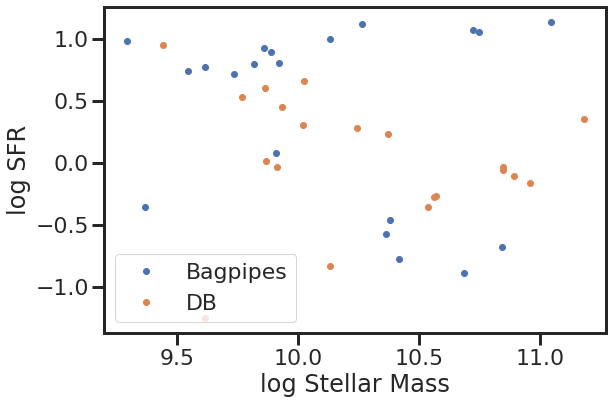

In [11]:
plt.figure(figsize=(9,6))
plt.plot(bagpipes_fits['stellar_mass_50'],np.log10(bagpipes_fits['sfr_50']),'o',label='Bagpipes')
plt.plot(db_fits['mstar_50'],db_fits['sfr_50'],'o',label='DB')
plt.xlabel('log Stellar Mass'); plt.ylabel('log SFR');plt.legend()
plt.show()

# Comparison against truth

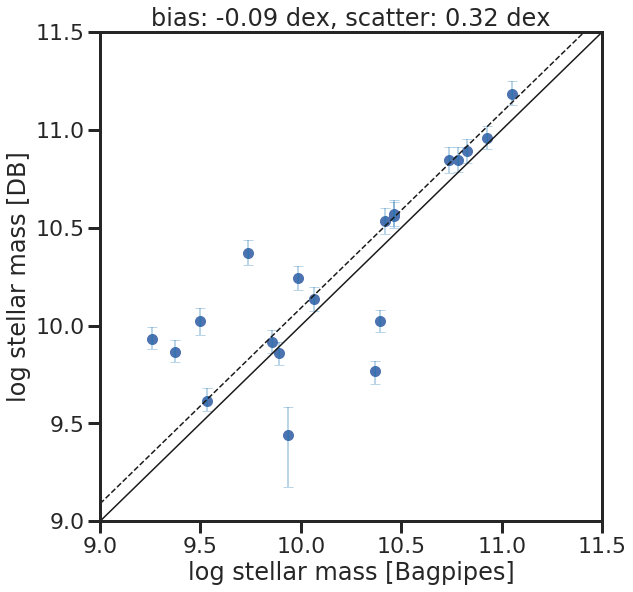

In [15]:

plt.figure(figsize=(9,9))

xdata = galaxy_params['mStar']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = db_fits['mstar_50']
yerr_lo = db_fits['mstar_50'] - db_fits['mstar_16']
yerr_hi = db_fits['mstar_84'] - db_fits['mstar_50']
xlabel_val = 'log stellar mass [Bagpipes]'
ylabel_val = 'log stellar mass [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_truth_mass_comparison.png',bbox_inches='tight')

plt.show()

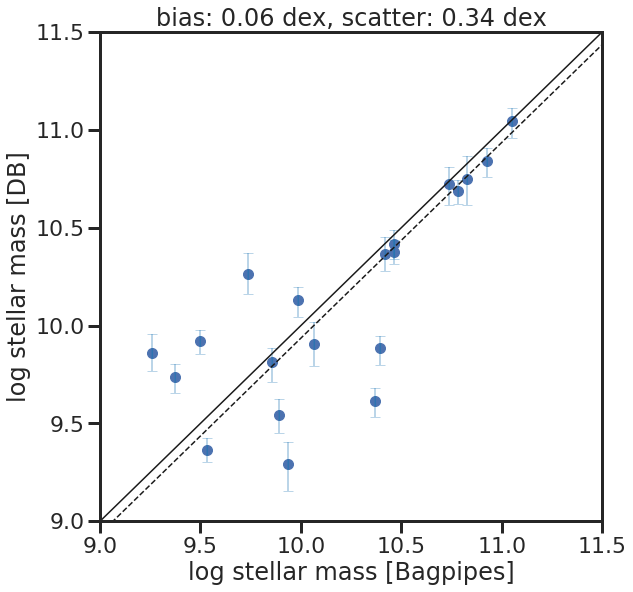

In [17]:

plt.figure(figsize=(9,9))

xdata = galaxy_params['mStar']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = bagpipes_fits['stellar_mass_50']
yerr_lo = bagpipes_fits['stellar_mass_50'] - bagpipes_fits['stellar_mass_16']
yerr_hi = bagpipes_fits['stellar_mass_84'] - bagpipes_fits['stellar_mass_50']
xlabel_val = 'log stellar mass [Bagpipes]'
ylabel_val = 'log stellar mass [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('bagpipes_truth_mass_comparison.png',bbox_inches='tight')

plt.show()